In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# problem 1

In [25]:
fb = pd.read_csv('facebook_train.csv')
fb = fb.dropna()
fb

,total_followers,type,category,month,weekday,hour,paid,comment,like,share
0,124050,Photo,3,6,4,17,1,3,77,16
1,132556,Photo,2,8,3,24,0,11,313,50
2,92786,Photo,2,2,6,17,1,2,145,39
3,135632,Photo,1,9,2,1,0,2,299,49
4,139540,Link,1,12,3,17,1,7,229,21
...,...,...,...,...,...,...,...,...,...,...
392,138114,Status,2,12,2,1,0,12,498,87
393,127937,Status,2,6,3,18,0,4,85,20
394,135656,Video,1,9,6,24,0,7,397,143
395,124663,Photo,3,6,3,16,1,1,87,18


In [26]:
def transform(x):
    if x == 'Photo':
        return 1
    elif x == 'Link':
        return 2
    else:
        return 3
    

In [27]:
fb['cvt_type'] = fb['type'].apply(lambda x: transform(x))
fb

,total_followers,type,category,month,weekday,hour,paid,comment,like,share,cvt_type
0,124050,Photo,3,6,4,17,1,3,77,16,1
1,132556,Photo,2,8,3,24,0,11,313,50,1
2,92786,Photo,2,2,6,17,1,2,145,39,1
3,135632,Photo,1,9,2,1,0,2,299,49,1
4,139540,Link,1,12,3,17,1,7,229,21,2
...,...,...,...,...,...,...,...,...,...,...,...
392,138114,Status,2,12,2,1,0,12,498,87,3
393,127937,Status,2,6,3,18,0,4,85,20,3
394,135656,Video,1,9,6,24,0,7,397,143,3
395,124663,Photo,3,6,3,16,1,1,87,18,1


# predict comment

In [28]:
#get dependent and independent variables for the model
x = np.array(fb[['total_followers', 'cvt_type', 'category', 'month', 'weekday', 'paid']])
y = np.array(fb['comment']).reshape(-1,1)


In [29]:
#split data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 11 )
#specify model
cmt_reg = LinearRegression()
#train model
cmt_reg.fit(X_train, y_train)
#create predicted result for train data
pre_train = cmt_reg.predict(X_train)
#predicted results of test data
pre_test = cmt_reg.predict(X_test)
#compare std of output of 2 datasets
print('standard deviation of training set is ', np.std((pre_train.reshape(1,len(pre_train)), y_train.reshape(1,len(y_train)))))
print('standard deviation of test set is ',     np.std((pre_test.reshape(1,len(pre_test)), y_test.reshape(1,len(y_test)))))

standard deviation of training set is  23.311756425781784
standard deviation of test set is  9.347227647431847


In [30]:
import statsmodels.api as sm
from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.103
Model:                            OLS   Adj. R-squared (uncentered):              0.083
Method:                 Least Squares   F-statistic:                              5.206
Date:                Sun, 13 Sep 2020   Prob (F-statistic):                    4.33e-05
Time:                        19:53:54   Log-Likelihood:                         -1356.6
No. Observations:                 277   AIC:                                      2725.
Df Residuals:                     271   BIC:                                      2747.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          6.578e-05   9.15e-05      0.719      0.473      -0.000       0.000
x2            -1.0220      3.273     -0.312      0.755      -7.466       5.422
x3            -0.0374      2.333     -0.016      0.987      -4.631       4.556
x4            -0.2331      0.879     -0.265      0.791      -1.963       1.497
x5             0.8744      1.013      0.863      0.389      -1.120       2.868
x6             7.0525      4.528      1.557      0.121      -1.863      15.968
==============================================================================
Omnibus:                      473.704   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           136199.825
Skew:                           9.285   Prob(JB):                         0.00
Kurtosis:                     110.032   Cond. No.                     2.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
mean_squared_error(pre_test,y_test)

163.34285920776375

In [ ]:
plt.scatter(

In [32]:
# create table for train data set
train_data = pd.DataFrame(X_train, columns = ['total_followers', 'cvt_type', 'category', 'month', 'weekday', 'paid'])
train_data['comment'] = y_train
train_data['pre_comment'] = pre_train 

In [33]:
# create table for test data set
test_data = pd.DataFrame(X_test, columns = ['total_followers', 'cvt_type', 'category', 'month', 'weekday', 'paid'])
test_data['comment'] = y_test
test_data['pre_comment'] = pre_test

In [34]:
#merge train and test data together
all_data = pd.concat([train_data, test_data], keys = ['train','test'])

from sklearn.utils import shuffle
all_data = shuffle(all_data)
all_data

total_followers  cvt_type  category  month  weekday  paid  comment  \
train 44            134883         3         2      9        3     0        4   
test  5             137112         1         3     11        5     0       10   
      11            117678         1         3      5        3     1       14   
train 135           138302         2         1     12        6     0        1   
      2             128816         1         3      7        2     0       11   
...                    ...       ...       ...    ...      ...   ...      ...   
      211           131498         3         1      7        7     1       21   
      17            138114         3         2     12        2     0       12   
test  56            133244         1         3      8        3     1        7   
train 134           139336         1         1     11        7     1        9   
test  1             135388         3         2      9        3     1        2   

           pre_comment  
train 44      8.211893  
test  5       8.255848  
      11     16.222774  
train 135     6.879188  
      2       9.645540  
...                ...  
      211    21.238569  
      17      2.532989  
test  56     17.364859  
train 134    17.617353  
test  1      15.156903  

[397 rows x 8 columns]

# predict likes

In [15]:
x = np.array(fb[['total_followers', 'cvt_type', 'category', 'month', 'weekday', 'paid']])
y = np.array(fb['like']).reshape(-1,1)

In [16]:
#split data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 11 )
#specify model
like_reg = LinearRegression()
#train model
like_reg.fit(X_train, y_train)
#create predicted result for train data
pre_train = like_reg.predict(X_train)
#predicted results of test data
pre_test = like_reg.predict(X_test)
#compare std of output of 2 datasets
print('standard deviation of training set is ', np.std((pre_train.reshape(1,len(pre_train)), y_train.reshape(1,len(y_train)))))
print('standard deviation of test set is ',     np.std((pre_test.reshape(1,len(pre_test)), y_test.reshape(1,len(y_test)))))

standard deviation of training set is  323.9342991720409
standard deviation of test set is  224.93242339321006


In [17]:
import statsmodels.api as sm
from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.219
Model:                            OLS   Adj. R-squared (uncentered):              0.201
Method:                 Least Squares   F-statistic:                              12.64
Date:                Sun, 13 Sep 2020   Prob (F-statistic):                    1.42e-12
Time:                        19:51:39   Log-Likelihood:                         -2081.7
No. Observations:                 277   AIC:                                      4175.
Df Residuals:                     271   BIC:                                      4197.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0007      0.001      0.529      0.598      -0.002       0.003
x2           -30.4319     44.854     -0.678      0.498    -118.738      57.874
x3            37.4506     31.974      1.171      0.243     -25.498     100.399
x4             4.2501     12.042      0.353      0.724     -19.458      27.958
x5            11.2763     13.880      0.812      0.417     -16.049      38.602
x6           135.6351     62.053      2.186      0.030      13.468     257.803
==============================================================================
Omnibus:                      451.049   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109817.472
Skew:                           8.466   Prob(JB):                         0.00
Kurtosis:                      99.063   Cond. No.                     2.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
mean_squared_error(pre_test,y_test)

90246.94109246354

In [19]:
# create table for train data set
train_data = pd.DataFrame(X_train, columns = ['total_followers', 'cvt_type', 'category', 'month', 'weekday', 'paid'])
train_data['like'] = y_train
train_data['pre_like'] = pre_train 

# create table for test data set
test_data = pd.DataFrame(X_test, columns = ['total_followers', 'cvt_type', 'category', 'month', 'weekday', 'paid'])
test_data['like'] = y_test
test_data['pre_like'] = pre_test

#merge train and test data together
all_data = pd.concat([train_data, test_data], keys = ['train','test'])

from sklearn.utils import shuffle
all_data = shuffle(all_data)
all_data

total_followers  cvt_type  category  month  weekday  paid  like  \
train 102           139540         2         1     12        3     1   229   
test  2             135121         1         1      9        5     0    76   
train 211           131498         3         1      7        7     1   372   
      28            117573         1         3      5        5     1   117   
      37            128306         1         1      7        3     0    82   
...                    ...       ...       ...    ...      ...   ...   ...   
      39            129070         1         2      7        1     1    56   
test  78            135402         1         2      9        6     0    84   
train 49            128153         1         2      7        7     0   198   
test  102           115848         1         3      4        7     0   142   
      84            138660         1         2     12        6     0   399   

             pre_like  
train 102  267.642222  
test  2    198.828245  
train 211  310.202290  
      28   383.273176  
      37   168.521074  
...               ...  
      39   319.221875  
test  78   251.345931  
train 49   255.959760  
test  102  278.293142  
      84   233.334862  

[397 rows x 8 columns]

# predict shares

In [20]:
x = np.array(fb[['total_followers', 'cvt_type', 'category', 'month', 'weekday', 'paid']])
y = np.array(fb['share']).reshape(-1,1)

In [21]:
#split data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 11 )
#specify model
share_reg = LinearRegression()
#train model
share_reg.fit(X_train, y_train)
#create predicted result for train data
pre_train = share_reg.predict(X_train)
#predicted results of test data
pre_test = share_reg.predict(X_test)
#compare std of output of 2 datasets
print('standard deviation of training set is ', np.std((pre_train.reshape(1,len(pre_train)), y_train.reshape(1,len(y_train)))))
print('standard deviation of test set is ',     np.std((pre_test.reshape(1,len(pre_test)), y_test.reshape(1,len(y_test)))))

standard deviation of training set is  44.62894896159827
standard deviation of test set is  24.56109969943285


In [22]:
import statsmodels.api as sm
from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.254
Model:                            OLS   Adj. R-squared (uncentered):              0.237
Method:                 Least Squares   F-statistic:                              15.34
Date:                Sun, 13 Sep 2020   Prob (F-statistic):                    3.89e-15
Time:                        19:52:24   Log-Likelihood:                         -1531.7
No. Observations:                 277   AIC:                                      3075.
Df Residuals:                     271   BIC:                                      3097.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.908e-05      0.000      0.111      0.912      -0.000       0.000
x2             3.3066      6.159      0.537      0.592      -8.820      15.433
x3             7.0007      4.391      1.594      0.112      -1.644      15.645
x4            -0.1881      1.654     -0.114      0.910      -3.444       3.068
x5             2.7368      1.906      1.436      0.152      -1.016       6.489
x6            18.3506      8.521      2.154      0.032       1.574      35.127
==============================================================================
Omnibus:                      516.079   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           256463.588
Skew:                          10.816   Prob(JB):                         0.00
Kurtosis:                     150.488   Cond. No.                     2.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
mean_squared_error(pre_test,y_test)

1077.4925369468654

In [24]:
# create table for train data set
train_data = pd.DataFrame(X_train, columns = ['total_followers', 'cvt_type', 'category', 'month', 'weekday', 'paid'])
train_data['share'] = y_train
train_data['pre_share'] = pre_train 

# create table for test data set
test_data = pd.DataFrame(X_test, columns = ['total_followers', 'cvt_type', 'category', 'month', 'weekday', 'paid'])
test_data['share'] = y_test
test_data['pre_share'] = pre_test

#merge train and test data together
all_data = pd.concat([train_data, test_data], keys = ['train','test'])

from sklearn.utils import shuffle
all_data = shuffle(all_data)
all_data

total_followers  cvt_type  category  month  weekday  paid  share  \
train 268           136652         1         1     10        5     1     17   
      274           138478         1         2     11        5     0     10   
      237            97722         1         1      3        4     1     29   
test  117            80807         1         2      1        2     0     26   
      26            139731         3         1     11        3     1     16   
...                    ...       ...       ...    ...      ...   ...    ...   
train 261            90219         1         3      2        7     0     71   
      132           135460         1         2      9        5     1     16   
      128           138243         1         1     11        4     0     22   
      124           129470         1         3      7        3     0     46   
      16            138408         1         3     12        7     0     58   

           pre_share  
train 268  42.653169  
      274  30.779803  
      237  38.302219  
test  117  19.500423  
      26   43.850423  
...              ...  
train 261  42.164508  
      132  50.939537  
      128  20.725943  
      124  35.496776  
      16   42.068628  

[397 rows x 8 columns]

# Problem 2

In [168]:
cas = pd.read_csv('casualty_train.csv')
cas.head(10)

,casualty_class,gender,age,severe,pedestrian_location,pedestrian_movement,travel,year
0,passenger,female,33,False,NaN,NaN,motorbike,2007
1,passenger,female,20,False,NaN,NaN,car,2005
2,passenger,male,52,False,NaN,NaN,car,2006
3,passenger,female,17,False,NaN,NaN,pedestrian,2012
4,passenger,female,20,False,NaN,NaN,motorbike,2010
5,pedestrian,female,40,True,In road,In Rd Not Crossing,bicycle,2008
6,passenger,female,40,False,NaN,NaN,motorbike,2005
7,passenger,female,23,False,NaN,NaN,taxi,2007
8,driver,female,45,False,NaN,NaN,car,2006
9,pedestrian,male,8,False,Close to Crossing,Drivers N/Side,bicycle,2010


In [169]:
print('cas.pedestrian_movement.unique: ',cas.pedestrian_movement.unique())
print()
print('cas.pedestrian_location.unique: ',cas.pedestrian_location.unique())
print()
print('cas.travel.unique: ',cas.travel.unique())
print()
print('cas.casualty_class.unique: ',cas.casualty_class.unique())
print()

cas.pedestrian_movement.unique:  [nan 'In Rd Not Crossing' 'Drivers N/Side' 'Unknown Or Other'
 'Drivers N/Side Msk' 'Drivers O/Side' 'Back To Traffic'
 'Drivers O/Side Msk' 'Facing Traffic' 'In Rd Not Crossing Msk']

cas.pedestrian_location.unique:  [nan 'In road' 'Close to Crossing' 'Not on Crossing' 'Unknown'
 'Pedestrian Crossing' 'Footpath' 'Zig-Zag']

cas.travel.unique:  ['motorbike' 'car' 'pedestrian' 'bicycle' 'taxi' 'bus' 'other']

cas.casualty_class.unique:  ['passenger' 'pedestrian' 'driver']



In [202]:
cas.age.unique()

array(['33', '20', '52', '17', '40', '23', '45', '8', '7', 'Unknown',
       '43', '34', '32', '31', '29', '50', '4', '12', '25', '27', '38',
       '39', '51', '37', '86', '10', '46', '36', '28', '60', '57', '65',
       '21', '68', '3', '42', '18', '26', '24', '44', '61', '48', '5',
       '11', '35', '58', '13', '30', '56', '22', '84', '1', '15', '49',
       '63', '53', '41', '74', '73', '77', '19', '71', '75', '16', '47',
       '14', '64', '76', '2', '81', '79', '54', '67', '9', '83', '66',
       '87', '78', '80', '69', '59', '93', '70', '72', '88', '6', '85',
       '55', '82', '62', '89', '92', '0', '90', '98', '95', '91', '96',
       '97', '94', '99'], dtype=object)

In [205]:
cas['age'][cas['age'] == 'Unknown']= '0'
cas['age'] = pd.to_numeric(cas.age)
cas['pedestrian_movement'][pd.isnull(cas['pedestrian_movement'])]= 'NaN'
cas['pedestrian_location'][pd.isnull(cas['pedestrian_location'])]= 'NaN'

cas

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,casualty_class,gender,age,severe,pedestrian_location,pedestrian_movement,travel,year
0,1,0,33,0,3,8,3,2007
1,1,0,20,0,3,8,2,2005
2,1,1,52,0,3,8,2,2006
3,1,0,17,0,3,8,5,2012
4,1,0,20,0,3,8,3,2010
...,...,...,...,...,...,...,...,...
232830,1,0,40,0,3,8,2,2014
232831,1,0,41,0,3,8,5,2013
232832,2,0,45,0,0,1,0,2010
232833,2,1,10,1,0,2,0,2009


In [226]:
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [207]:
le = LabelEncoder()

replicated_cas['casualty_class'] = le.fit_transform(cas.casualty_class)
replicated_cas['gender'] = le.fit_transform(cas.gender)
replicated_cas['travel'] = le.fit_transform(cas.travel)
replicated_cas['pedestrian_movement'] = le.fit_transform(cas.pedestrian_movement)
replicated_cas['pedestrian_location'] = le.fit_transform(cas.pedestrian_location)
replicated_cas['severe'] = le.fit_transform(cas.severe)


In [208]:
X = replicated_cas.drop('severe', axis = 'columns')
Y = replicated_cas.severe
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 11)

In [217]:
parameters = {'n_neighbors':[3,5,7,9]}
classifier = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = classifier,
                             param_grid = parameters, 
                             scoring = 'accuracy', 
                             cv = 10)
# We learn the digits on the first half of the digits
grid_search = grid_search.fit(X_train, y_train)

grid_search.best_score_


0.8888970694753405

In [223]:
grid_search.best_params_

{'n_neighbors': 9}

In [225]:
classifier = KNeighborsClassifier(n_neighbors = 9)
classifier.fit(X_train, y_train)
classifier.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for classifier KNeighborsClassifier(n_neighbors=9):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     62330
           1       0.00      0.00      0.00      7521

    accuracy                           0.89     69851
   macro avg       0.45      0.50      0.47     69851
weighted avg       0.80      0.89      0.84     69851




Text(0.5, 0.98, 'Confusion Matrix')

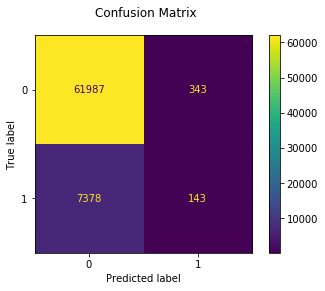

In [227]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

In [228]:
classifier.score(X_test,y_test)

0.8894647177563672